<h1>Trabalho final da disciplina de Aprendizado de maquina</h1>

Dataset escolhido:https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017
<br>Equipe: Carlos alexandre e Daniel nogueira

In [106]:
#Importando pacotes
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [115]:
#carregando base de dados
dengue = pd.read_csv('dengue-dataset.csv')

In [116]:
 dengue.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


In [117]:
#Tirando linhas com valores 'perdidos'
dengue.dropna(inplace=True)

In [118]:
#Separando o dia, o mês e o ano em 3 colunas
dengue['ano'],dengue['mes'],dengue['dia'] = dengue['data'].str.split('-').str
#tirando a coluna data
dengue.drop(columns='data',inplace=True)

In [119]:
#Mostrando os novos dados
dengue.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima,ano,mes,dia
0,237,179.2,25.7,20.2,28.1,1998,01,01
1,331,226.3,25.1,20.0,28.0,1998,02,01
2,562,149.1,24.8,22.4,27.2,1998,03,01
3,187,46.4,22.7,18.1,26.0,1998,04,01
4,32,88.3,19.2,15.7,22.9,1998,05,01


In [120]:
#Normalizando os dados
# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
X = normalizer.transform(dengue.iloc[:,0:6])

dengue_normalize = dengue.copy()
#substituindo cada valor novo na tabela original
dengue_normalize['casos-confirmados'] = X[:,0]
dengue_normalize['chuva'] = X[:,1]
dengue_normalize['temperatura-media'] = X[:,2]
dengue_normalize['temperatura-mininima'] = X[:,3]
dengue_normalize['temperatura-maxima'] = X[:,4]


In [121]:
dengue_normalize.head()     

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima,ano,mes,dia
0,0.117302,0.088694,0.012720,0.009998,0.013908,1998,01,01
1,0.162392,0.111025,0.012314,0.009812,0.013737,1998,02,01
2,0.270020,0.071637,0.011915,0.010762,0.013069,1998,03,01
3,0.093144,0.023112,0.011307,0.009016,0.012950,1998,04,01
4,0.015996,0.044139,0.009598,0.007848,0.011447,1998,05,01


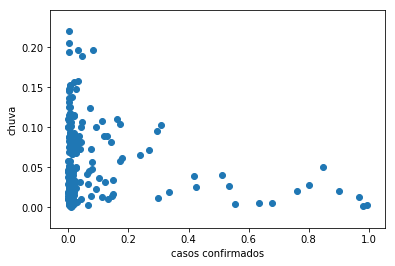

In [126]:
#correlacionando casos confirmados e a chuva
plt.scatter(dengue_normalize.iloc[:,0],dengue_normalize.iloc[:,1])
plt.xlabel("casos confirmados")
plt.ylabel("chuva")
plt.show()